# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [43]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Applications/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


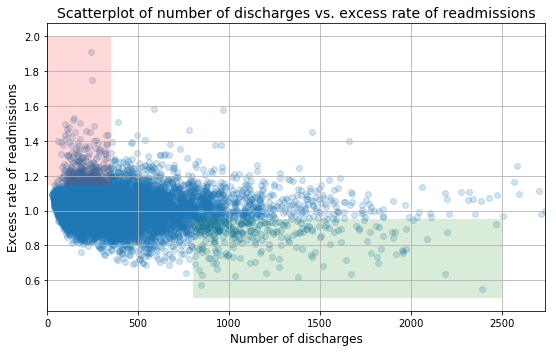

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

# Summary of Approach

Let's set up a test to see if the discharge rate and excess readmission rate are inversely correlated.  This is to say that with decreased discharge rates there are higher excess readmission rates.

The same comparison should be made between observed values such as Number of Readmissions in order to remove any noise generated by the 'expected readmission rate'.

For the first test let's assume the following:

    - Ho: Mu1 = Mu2
    - Ha: Mu1 < Mu2

Where 1 represents the large hospitals (>1000 discharges) and 2 the small (<100 discharges)

The z statistics for comparing means will be used at an alpha value of 0.01

Therefore critical value is zalpha = -2.33 for a lower tailed test

In [66]:
# sample the data for hospitals with discharges greater than 1000
large_capacity_hospitals = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] >1000)]
large_capacity_hospitals.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,463.000000,463.000000,0.0,463.000000,463.000000,463.000000,463.000000
mean,251570.626350,1383.427646,NaN,0.978335,16.061555,16.106695,216.192225
std,136147.064112,459.109724,NaN,0.120007,8.142111,7.712576,128.659606
min,10039.000000,1002.000000,NaN,0.549500,2.700000,4.100000,23.000000
25%,140118.000000,1107.000000,NaN,0.907900,5.500000,5.300000,87.000000
50%,230130.000000,1242.000000,NaN,0.986400,19.200000,19.500000,229.000000
75%,340128.000000,1512.000000,NaN,1.057100,22.650000,22.500000,289.500000
max,520138.000000,6793.000000,NaN,1.454300,31.000000,25.700000,879.000000


In [64]:
# sample the data for hospitals with discharges less than 100
small_capacity_hospitals = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<=100]
small_capacity_hospitals.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,1304.000000,1304.000000,81.0,1223.000000,1223.000000,1223.000000,1223.000000
mean,253996.913344,70.754601,7.0,1.022088,20.010057,19.619133,16.019624
std,160685.301786,24.676969,0.0,0.058154,3.026628,2.871217,4.339663
min,10012.000000,0.000000,7.0,0.893500,7.200000,5.300000,11.000000
25%,110059.000000,59.000000,7.0,0.983800,18.000000,17.950000,13.000000
50%,240069.000000,76.000000,7.0,1.016700,20.000000,19.800000,15.000000
75%,390068.500000,89.000000,7.0,1.052750,22.000000,21.500000,18.000000
max,670082.000000,100.000000,7.0,1.495300,30.000000,28.000000,34.000000


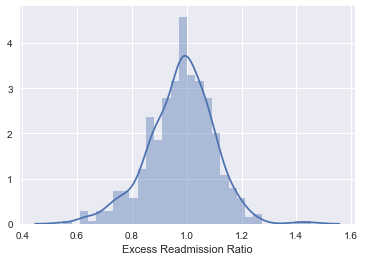

In [70]:
# Demonstrate normal distribution of the data
temp = large_capacity_hospitals['Excess Readmission Ratio']
sns.distplot(temp,bins=30)

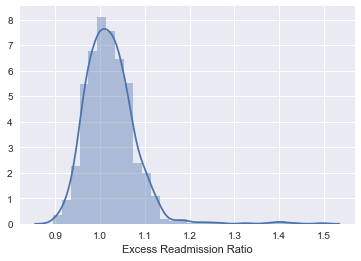

In [71]:
# Small Cap hospitals normal distribution, had to drop values that showed as NaN
temp1 = small_capacity_hospitals['Excess Readmission Ratio']
temp1 = temp1.dropna()
sns.distplot(temp1,bins=30)

It can be seen that the samples are normally distributed and we can conclude from their size that the CLT will hold.


Let us proceed to calculate the z statistic given the preceding information

In [69]:
z= (0.978-1.022)/math.sqrt(0.12**2/463+0.058**2/1223)
z

-7.562401094793467

The hypothesis test can be rejected when the z values is less than the -Zalpha value

In this case -7.56 < -2.33 and therefore the hypothesis that the means are equal can be rejected

The corresponding p-value for is given by the area under the lower tail at the calculated z value

for a lower tailed test p-value = Omega(z) which in this case is very nearly 0, hence we reject the hypothesis at this confidence level of 99%.

In so far as the recommendation is concerned, it is valid.  However what is meant by statistical significance is not necessarily practical or causal.

In this case it may be worth considering that the larger hospitals are better at estimating the readmission rates and to investigate different methods.

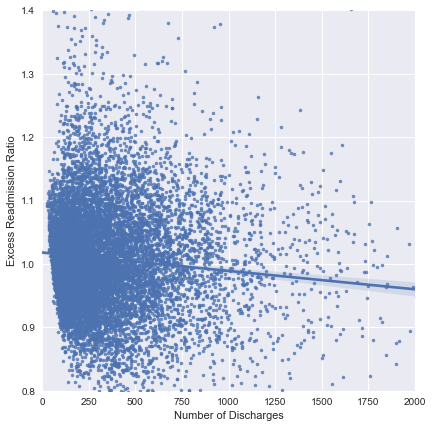

In [105]:
g= sns.lmplot(x='Number of Discharges',y='Excess Readmission Ratio',data=clean_hospital_read_df,palette='coolwarm',size=6,aspect=1,markers='.')
g.set(xlim=(0,2000),ylim=(.8,1.4))

The plot above is an attempt to clarify the correlation by adding in a line of best fit and altering the axes to zoom in on the core of the data.

The advantage of using a plot similar to the one shown initially is that it is a scatter plot and good at showing trend.  The disadvantage is that it can be busy and difficult to look at especially when there are so many data points.

There are probably other more clear plots available.  I might consider splitting the data by ERR>1 and <1 to provide contrast in the plot.

## Final Report

A. I agree with the the original analysis in part.  The correlation is statistically significant but I would consider further investigation before drawing a conclusion.

B. The statistical test supports the alternate hypothesis that the means are different and in fact the larger hospitals have lower rates of excess readmission.  Further investigation is required in to the methods of estimating/predicting readmission before a conclusion can be made
